[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyGenomeViz/blob/main/docs/getting_started.ipynb)

In [1]:
# Colab environment may require 'RESTART RUNTIME' to activate newly installed packages.
# %pip install pygenomeviz 

## Simple Datasets

### Add Track

- Create [GenomeViz](../api-docs/genomeviz/#pygenomeviz.genomeviz.GenomeViz) class instance
- Add FeatureTrack by [add_feature_track](../api-docs/genomeviz/#pygenomeviz.genomeviz.GenomeViz.add_feature_track) method

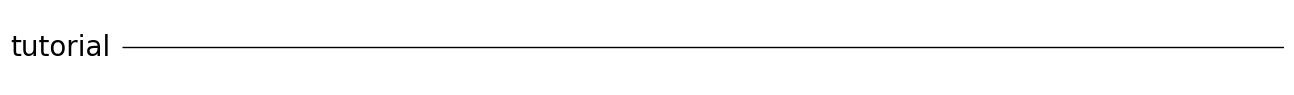

In [2]:
from pygenomeviz import GenomeViz

gv = GenomeViz()
track = gv.add_feature_track(name="tutorial", size=1000)

fig = gv.plotfig()

### Add Features

- Add features by [add_feature](../api-docs/track/#pygenomeviz.track.FeatureTrack.add_feature) method

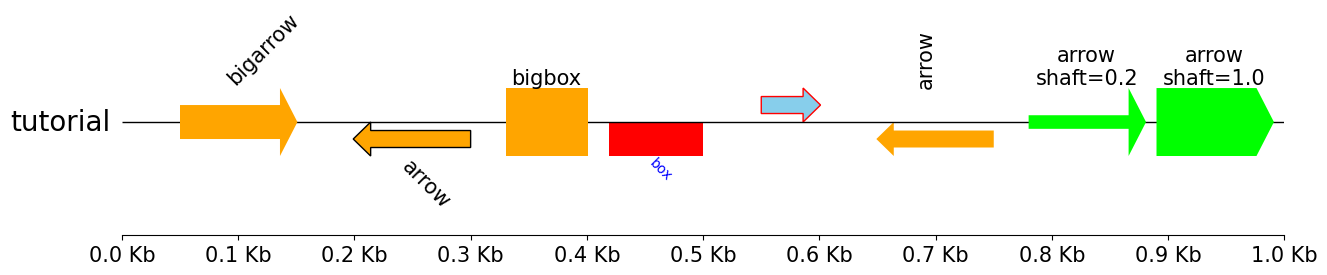

In [3]:
from pygenomeviz import GenomeViz

gv = GenomeViz(tick_style="axis")
track = gv.add_feature_track(name="tutorial", size=1000)

track.add_feature(start=50, end=150, strand=1, label="bigarrow")
track.add_feature(start=200, end=300, strand=-1, label="arrow", plotstyle="arrow", linewidth=1)
track.add_feature(start=330, end=400, strand=1, label="bigbox", plotstyle="bigbox", labelrotation=0, labelha="center")
track.add_feature(start=420, end=500, strand=-1, label="box", plotstyle="box", facecolor="red", labelcolor="blue", labelsize=10)
track.add_feature(start=550, end=600, strand=1, plotstyle="arrow", facecolor="skyblue", edgecolor="red", linewidth=1)
track.add_feature(start=650, end=750, strand=-1, plotstyle="arrow", label="arrow", labelrotation=90, labelvpos="top")
track.add_feature(start=780, end=880, strand=1, label="arrow\nshaft=0.2", arrow_shaft_ratio=0.2, labelrotation=0, labelha="center", facecolor="lime")
track.add_feature(start=890, end=990, strand=1, label="arrow\nshaft=1.0", arrow_shaft_ratio=1.0, labelrotation=0, labelha="center", facecolor="lime")

fig = gv.plotfig()

### Add Tracks & Features

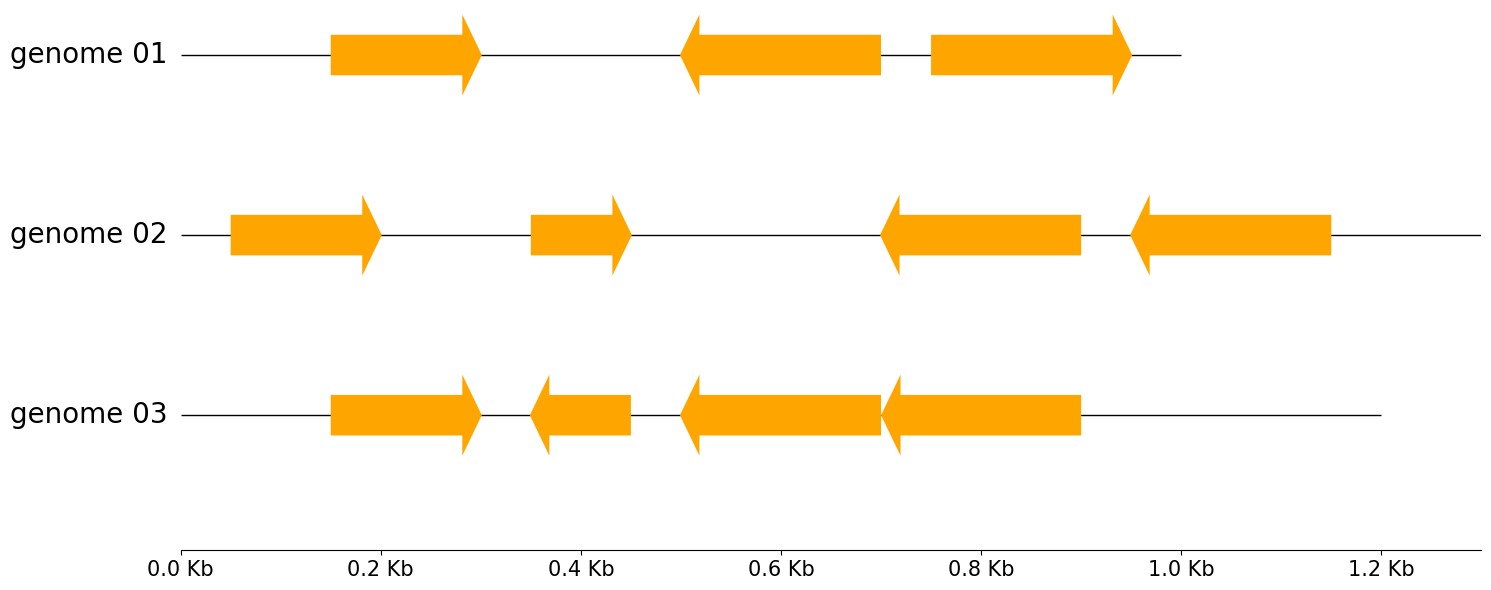

In [4]:
from pygenomeviz import GenomeViz

genome_list = (
    {"name": "genome 01", "size": 1000, "cds_list": ((150, 300, 1), (500, 700, -1), (750, 950, 1))},
    {"name": "genome 02", "size": 1300, "cds_list": ((50, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1))},
    {"name": "genome 03", "size": 1200, "cds_list": ((150, 300, 1), (350, 450, -1), (500, 700, -1), (701, 900, -1))},
)

gv = GenomeViz(tick_style="axis")
for genome in genome_list:
    name, size, cds_list = genome["name"], genome["size"], genome["cds_list"]
    track = gv.add_feature_track(name, size)
    for cds in cds_list:
        start, end, strand = cds
        track.add_feature(start, end, strand)

fig = gv.plotfig()

### Add Links

- Add links by [add_link](../api-docs/genomeviz/#pygenomeviz.genomeviz.GenomeViz.add_link) method

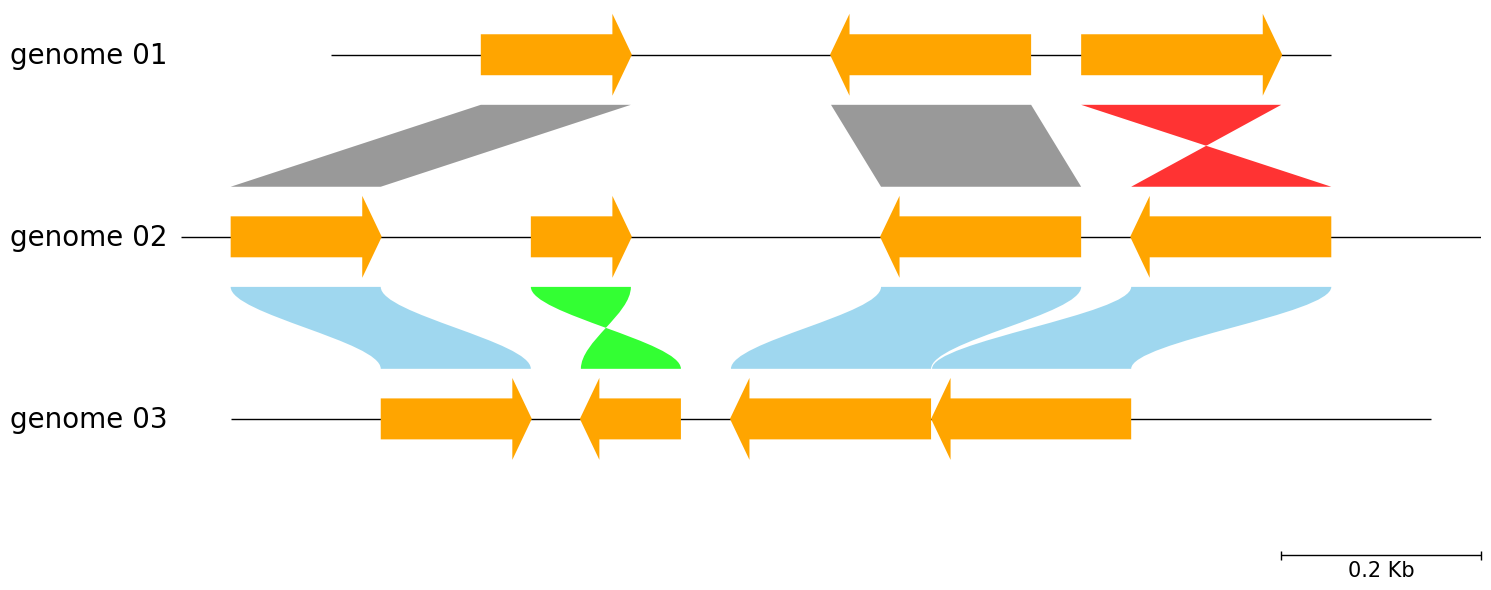

In [5]:
from pygenomeviz import GenomeViz

genome_list = (
    {"name": "genome 01", "size": 1000, "cds_list": ((150, 300, 1), (500, 700, -1), (750, 950, 1))},
    {"name": "genome 02", "size": 1300, "cds_list": ((50, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1))},
    {"name": "genome 03", "size": 1200, "cds_list": ((150, 300, 1), (350, 450, -1), (500, 700, -1), (701, 900, -1))},
)

gv = GenomeViz(align_type="center", tick_style="bar")
for genome in genome_list:
    name, size, cds_list = genome["name"], genome["size"], genome["cds_list"]
    track = gv.add_feature_track(name, size)
    for cds in cds_list:
        start, end, strand = cds
        track.add_feature(start, end, strand)

# Add links between "genome 01" and "genome 02"
gv.add_link(("genome 01", 150, 300), ("genome 02", 50, 200))
gv.add_link(("genome 01", 700, 500), ("genome 02", 900, 700))
gv.add_link(("genome 01", 750, 950), ("genome 02", 1150, 950))
# Add links between "genome 02" and "genome 03"
gv.add_link(("genome 02", 50, 200), ("genome 03", 150, 300), normal_color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 02", 350, 450), ("genome 03", 450, 350), normal_color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 02", 900, 700), ("genome 03", 700, 500), normal_color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 03", 900, 701), ("genome 02", 1150, 950), normal_color="skyblue", inverted_color="lime", curve=True)

fig = gv.plotfig()

## Real Datasets

### Add Track from Genbank file

- Download real datasets by `load_dataset` function  
  It contains Genbank files & Genome comparison links datasets
- Load genbank files by [Genbank](../api-docs/genbank/#pygenomeviz.genbank.Genbank) class

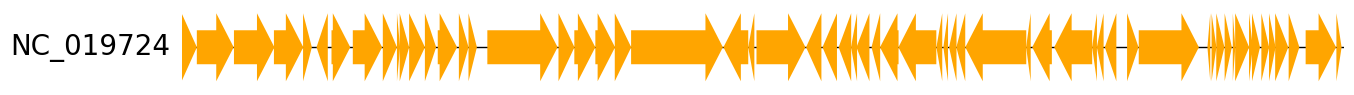

In [6]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gbk_files, _ = load_dataset("enterobacteria_phage")
gbk = Genbank(gbk_files[0])

gv = GenomeViz()
track = gv.add_feature_track(name=gbk.name, size=gbk.genome_length)
track.add_genbank_features(gbk)

fig = gv.plotfig()

### Add Tracks & Links from Genbank files

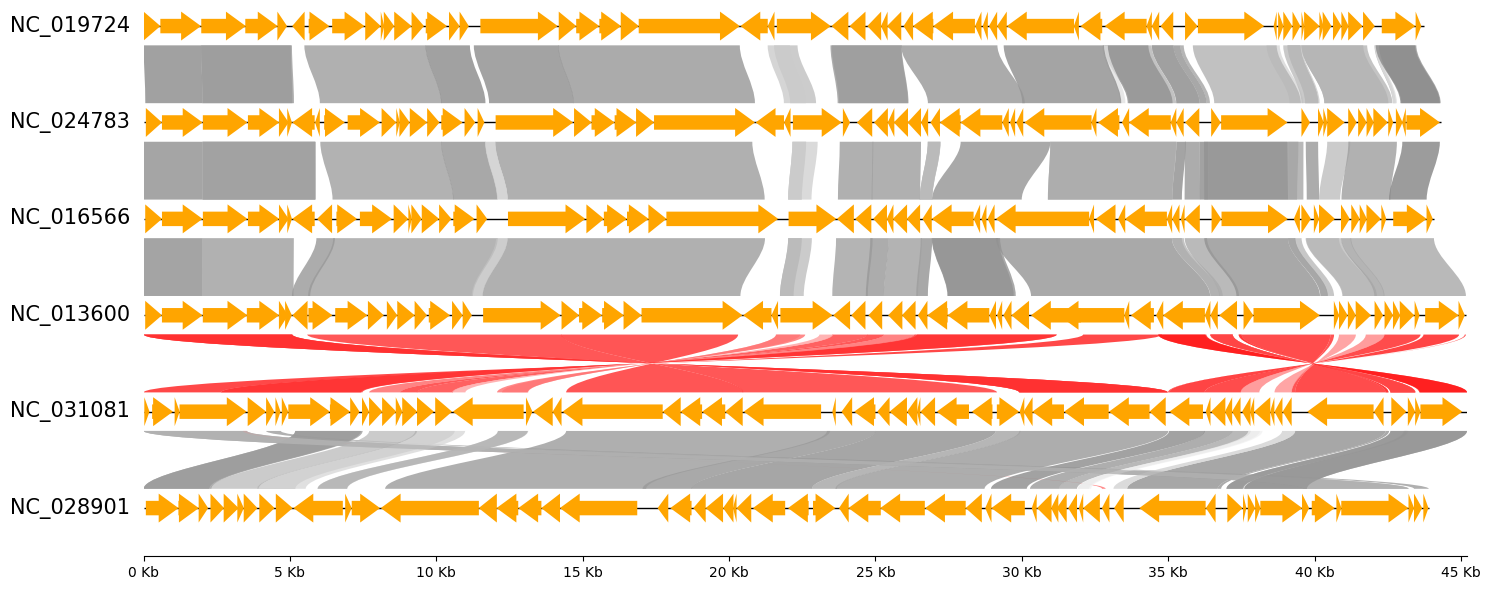

In [7]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    fig_track_height=0.5,
    feature_track_ratio=0.5,
    tick_track_ratio=0.5,
    tick_style="axis",
    tick_labelsize=10,
)

gbk_files, links = load_dataset("enterobacteria_phage")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length, labelsize=15)
    track.add_genbank_features(gbk)

min_identity = int(min([link.identity for link in links]))
for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, v=link.identity, vmin=min_identity, curve=True)

fig = gv.plotfig()
